In [338]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

%config InlineBackend.figure_format = 'retina'

In [339]:
iris = load_iris()

In [340]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [341]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [342]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [343]:
iris.target[0]

0

In [344]:
iris.target_names[0]

'setosa'

In [345]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    train_size=0.8,
    random_state=42
)

In [346]:
model = LogisticRegression(max_iter=5000)

In [347]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [348]:
model.score(X_test, y_test)

1.0

In [349]:
model.score(X_train, y_train)

0.975

In [350]:
y_predict = model.predict(X_test)

In [351]:
cm = confusion_matrix(
    y_test,
    y_predict
)

<Axes: >

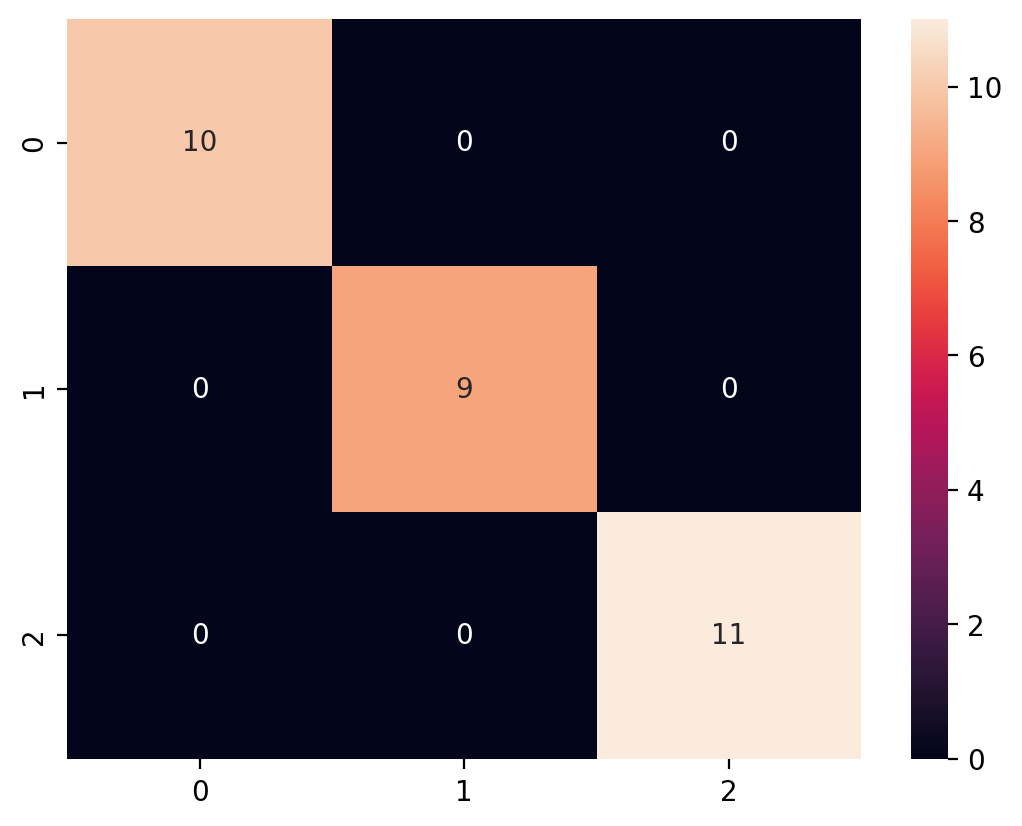

In [352]:
sns.heatmap(cm, annot=True)

In [353]:
# to get better idea, re-running multiple times to get mean testing score and training score
training_scores = np.array([])
testing_scores = np.array([])
iterations = 100
for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data,
        iris.target,
        train_size=0.8
        )
    training_scores = np.append(training_scores, model.score(X_train, y_train))
    testing_scores = np.append(testing_scores, model.score(X_test, y_test))
print(f"Mean training score after {iterations} iterations: {np.average(training_scores)}")
print(f"Mean testing score after {iterations} iterations: {np.average(testing_scores)}")

Mean training score after 100 iterations: 0.9798333333333331
Mean testing score after 100 iterations: 0.9806666666666668
